In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
BIC_df      = pd.read_csv('learning_output/BIC.csv')
linear_df   = pd.read_csv('learning_output/linear.csv')
deep_df     = pd.read_csv('learning_output/deep.csv')
rnn_df      = pd.read_csv('learning_output/rnn.csv')
rnn_relu_df = pd.read_csv('learning_output/rnn_relu.csv')

In [3]:
rate1_list = []
rate2_list = []
for df in [BIC_df, linear_df, deep_df, rnn_df, rnn_relu_df]:
    if(df is BIC_df):
        method = "BIC"
    elif(df is linear_df):
        method = "linear"
    elif(df is deep_df):
        method = "deep"
    elif(df is rnn_df):
        method = "rnn"
    elif(df is rnn_relu_df):
        method = "rnn_relu"

    fold1_total_errs = df['fold_2_errs'].sum()
    fold2_total_errs = df['fold_2_errs'].sum()

    fold1_total_labels = df['fold_1_total_labels'].sum()
    fold2_total_labels = df['fold_2_total_labels'].sum()

    rate1 = (fold1_total_labels - fold1_total_errs)/fold1_total_labels
    rate2 = (fold2_total_labels - fold2_total_errs)/fold2_total_labels

    rate1_list.append(round(100*rate1, 2))
    rate2_list.append(round(100*rate2, 2))

    print("method: %7s \t fold1.test: %5.2f \t fold2.test: %5.2f" % (method, 100*rate1, 100*rate2))

method:     BIC 	 fold1.test: 65.43 	 fold2.test: 50.00
method:  linear 	 fold1.test: 76.06 	 fold2.test: 65.38
method:    deep 	 fold1.test: 81.91 	 fold2.test: 73.85
method:     rnn 	 fold1.test: 82.31 	 fold2.test: 74.42
method: rnn_relu 	 fold1.test: 83.24 	 fold2.test: 75.77


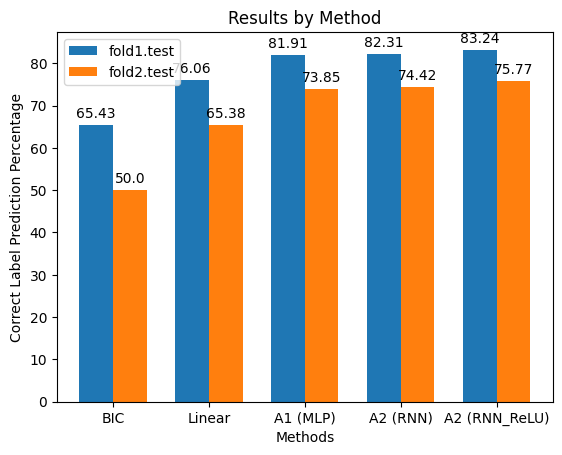

In [4]:
methods = ['BIC', 'Linear', 'A1 (MLP)', 'A2 (RNN)', 'A2 (RNN_ReLU)']
dataset_1_results = np.array(rate1_list)
dataset_2_results = np.array(rate2_list)

# Plotting
bar_width = 0.35
index = np.arange(len(methods))

fig, ax = plt.subplots()
bar1 = ax.bar(index, dataset_1_results, bar_width, label='fold1.test')
bar2 = ax.bar(index + bar_width, dataset_2_results, bar_width, label='fold2.test')

# Add numbers above each column
for i, v in enumerate(dataset_1_results):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

for i, v in enumerate(dataset_2_results):
    ax.text(i + bar_width, v + 1, str(v), ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel('Methods')
ax.set_ylabel('Correct Label Prediction Percentage')
ax.set_title('Results by Method')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods)
ax.legend()

# Show the plot
plt.show()
